In [4]:
import PIL as imagelib
import numpy as np
from IPython import display
%matplotlib inline
from matplotlib.pyplot import imshow
import matplotlib
import skimage
#import piexif
import cv2

In [6]:
img_stuff_face = imagelib.Image.open("./ImagePlayground/1995-97-089.jpg", 'r')
print(type(img_stuff_face))
print(img_stuff_face)
imshow(np.asarray(img_stuff_face))

<class 'PIL.JpegImagePlugin.JpegImageFile'>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=2942x2097 at 0x7FA03D119198>


Cute, but what we are really after is on the bottom corner.

In [7]:
# aprox left upper bound: [1750][2400]
# future: a function to find this dynamically
img_stuff_face.size
type(img_stuff_face)
local = img_stuff_face.copy()
#print(type(local))
cropped_date = local.crop(box=(2400, 1800, local.size[0], local.size[1]-150))

imshow(np.asarray(cropped_date))

That's more like it :D

(147, 542, 3)


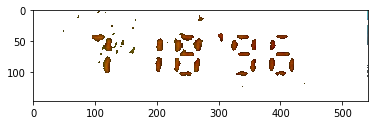

In [8]:
img_date_np = np.asarray(cropped_date)
cp_img_date_np = np.copy(img_date_np)
print(img_date_np.shape)
# lets cut some colors

white_rgb_tuple = [255,255,255]
img_date_np.setflags(write=1)

#to_cut = img_date_np[:,:,0] in range(65, 205)
lower_cut = img_date_np[:,:,0] < 70
upper_cut = img_date_np[:,:,0] > 205
and_it_was_all_red = img_date_np[:,:,0]

img_date_np[lower_cut] = white_rgb_tuple
img_date_np[upper_cut] = white_rgb_tuple

#imshow(and_it_was_all_red)
imshow(img_date_np)

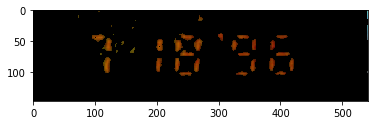

In [9]:
#imshow(cp_img_date_np)

elim_mask = cv2.inRange(cp_img_date_np, np.array([75,0,0]), np.array([175,200,200]))

new_img = cv2.bitwise_and(cp_img_date_np, cp_img_date_np, mask = elim_mask)
#cp_img_date_np[elim_mask] = rgb_tuple

imshow(new_img)

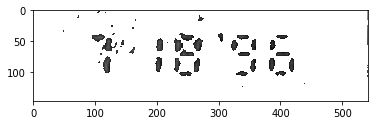

In [58]:
# make 'em black now
#black = img_date_np[:,:, 0] < 255
#img_date_np[black] = [0,0,0]
greyscale_date = skimage.color.rgb2gray(img_date_np)

imshow(greyscale_date, cmap="gray")

In [59]:
print(greyscale_date.dtype)
# greyscale_date = greyscale_date.astype(uint8)
greyscale_date = np.uint8(greyscale_date)

#greyscale_date = cv2.fastNlMeansDenoising(greyscale_date, 0, 3, 5)

imshow(greyscale_date, cmap="gray")

float64


In [116]:
kernel = np.ones((5,5),np.uint8)
opened_to_elim_extras = cv2.morphologyEx(img_date_np, cv2.MORPH_CLOSE, kernel)
#kernel = np.ones((2,2),np.uint8)
opened_to_elim_extras = cv2.erode(opened_to_elim_extras,kernel,iterations = 1)
imshow(opened_to_elim_extras, cmap="gray")